In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import random
import math
import operator

In [56]:
from sklearn.neighbors import KNeighborsClassifier
#Book = pd.read_excel('/home/data/MSA8010/msa8010f16t01/FinalD_Mukhar.xlsx',sheetname='FinalData',encoding='latin-1')
Book = pd.read_csv('/home/data/MSA8010/msa8010f16t01/KNN_Classifier_Dataset.csv',encoding='latin-1')

print(Book.columns)

Index(['UserID', 'ISBN', 'Rating', 'Author_stndr_values', 'Age_Stanrd',
       'Cntry_Stnd'],
      dtype='object')


In [57]:
x=Book.groupby('UserID').size()
x
#np.array(x)

UserID
8          7
10         1
12         1
22         4
32         2
36         1
44         1
64         1
67         1
68         1
69         1
70         1
75         1
79         1
83         1
92         3
99         1
102        1
160        1
176        3
183        8
207        1
228        1
242       26
243        7
244        2
250        1
254       52
256        1
257        2
          ..
278597     1
278621     1
278633     7
278637    16
278641     2
278644     1
278648     1
278663     1
278665     2
278668     5
278675     2
278694     2
278720     2
278721     1
278729     1
278731     1
278732     1
278747     2
278750     1
278777     1
278778     1
278788     1
278789     2
278795     1
278832     3
278838     3
278843    13
278844     1
278851     6
278854     1
dtype: int64

In [58]:
newBookDatadict = {'UserID':['count']}
#print(newBookDatadict)
newBookDatadf = Book.groupby('UserID').agg(newBookDatadict)
newBookDatadf = newBookDatadf.reset_index()
newBookDatadf.columns = ('UserID','UserIDCount')
newBookDatadf = newBookDatadf[(newBookDatadf.UserIDCount>20)]
#Book=newBookDatadf

In [59]:
joinedBookData = pd.merge(newBookDatadf,Book, on = "UserID", how = "inner")
del joinedBookData['UserIDCount']
Book=joinedBookData
Book.head()

,UserID,ISBN,Rating,Author_stndr_values,Age_Stanrd,Cntry_Stnd
0,242,34231136021,10,0.001021555,0.425287,0.344538
1,242,3596292646,7,0.003268975,0.425287,0.344538
2,242,3570300099,6,0.00858106,0.425287,0.344538
3,242,3548254268,10,0.213479416,0.425287,0.344538
4,242,3518111000,5,0.017979365,0.425287,0.344538


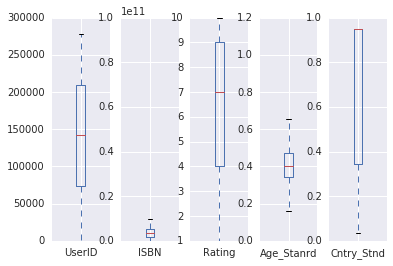

In [60]:
Book.plot(kind='box', subplots=True,sharex=False, sharey=False)
plt.show()

In [61]:
Book.UserID.dtype
Book.dtypes
#Book['ISBN'].astype('float64')

UserID                   int64
ISBN                     int64
Rating                   int64
Author_stndr_values     object
Age_Stanrd             float64
Cntry_Stnd             float64
dtype: object

In [62]:
X=Book[['Age_Stanrd','Cntry_Stnd','ISBN']]
y=Book[['Rating']]
print(X.shape)
y1=np.array(y)
y1
X1=np.array(X)
X1

(104448, 3)


array([[  4.25287356e-01,   3.44537815e-01,   3.42311360e+10],
       [  4.25287356e-01,   3.44537815e-01,   3.59629265e+09],
       [  4.25287356e-01,   3.44537815e-01,   3.57030010e+09],
       ..., 
       [  4.02298851e-01,   9.50055494e-01,   6.01595721e+08],
       [  4.02298851e-01,   9.50055494e-01,   3.02143621e+08],
       [  4.02298851e-01,   9.50055494e-01,   2.04330021e+08]])

In [63]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=123)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
        Rating
91755        9
30860        7
3831        10
77278        9
100541       4
30957        5
28480       10
77621        8
50720        9
75870        5
103635       6
23824        6
100704       6
34546        8
46934        8
83077       10
17989        5
49633        4
23101        7
49431        6
19665        6
65380        9
41382        2
18737        6
75942        2
81818        8
77080        5
11576        7
103416      10
54133        8
...        ...
6648         9
30255        4
83266       10
72020        7
26626        9
45507        6
73521        1
83012        1
14944        7
96676       10
68861        8
35662        8
17747        6
101785      10
65647        2
33710       10
71200        5
23166       10
55409        5
65632        3
22241       10
89302        5
46203        7
73299        9
15377        7
63206        6
61404        5
17730        6
28030       10
15725        6

[73113 rows x 1 columns]
       

In [64]:
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=1999)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
        Rating
96657        8
45028        8
20701       10
23402        7
57941       10
102281       5
95071        6
94726        7
56747        6
68716        5
65841        8
38000       10
10263        2
67601        9
27734        6
25514        6
77452        7
39855        2
4409         5
78362        8
98235        4
4833         4
44694        9
45140        9
54696        6
78185       10
27642        8
23091        7
17775        7
8132         3
...        ...
79431        7
80874        8
3368         7
32474        9
97498        8
8333         3
31861        7
89934        4
38285        2
64347        7
95044        9
5990         5
83404        3
2225        10
58323       10
101548       9
32144        8
19609        9
55812        7
52324        6
94308        4
76406        1
80829        3
24594        9
24919        5
2045         2
73323        4
54380        4
32704        8
81728        4

[52224 rows x 1 columns]
       

In [65]:
train_X, test_X, train_y, test_y = train_test_split(X1, y1, 
                                                    train_size=0.7, 
                                                    random_state=123,
                                                    stratify=y)
print(y1.shape)
y1=np.reshape(y1, len(y1))
train_y=np.reshape(train_y, len(train_y))
test_y=np.reshape(test_y, len(test_y))
print('All:', np.bincount(y1) / float(len(y1)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

(104448, 1)
All: [  0.           7.00539982   6.96135876   7.14518229   7.40081189
  10.07199755   9.0312883   12.05671722  14.30376838  12.23671109
  13.78676471]
Training: [  0.           7.00559408   6.96182621   7.14510415   7.40087262
  10.0720802    9.03122564  12.05667939  14.30388577  12.23585409
  13.78687785]
Test: [  0.           7.00494655   6.96026807   7.14536461   7.40067018
  10.07180469   9.0314345   12.05680549  14.30349449  12.23871071
  13.78650072]


In [66]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=123,
                                                    stratify=y)


In [67]:
train_X=train_X._get_numeric_data()
train_y=train_y._get_numeric_data()
test_X=test_X._get_numeric_data()
test_y=test_y._get_numeric_data()
print(test_y.shape)

(31335, 1)


In [68]:
y1=np.reshape(y1, len(y1))
train_y=np.reshape(train_y, len(train_y))
test_y=np.reshape(test_y, len(test_y))

In [69]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [70]:
classifier.fit(train_X, train_y.values.ravel())
pred_y = classifier.predict(test_X)
test_y=test_y.values.ravel()

print("Fraction Correct [Accuracy]:")
print(np.sum(pred_y == test_y) / float(len(test_y)))

Fraction Correct [Accuracy]:
0.114855592788


In [71]:
random.seed(10)
xf=[0,0,0,0,0,0,0,0,0,0]


for i in pred_y:
    if (i== 1):
        xf[0]+=1
    elif(i==2):
        xf[1]+=1
    elif(i==3):
        xf[2]+=1
    elif(i==4):
        xf[3]+=1
    elif(i==5):
        xf[4]+=1
    elif(i==6):
        xf[5]+=1
    elif(i==7):
        xf[6]+=1
    elif(i==8):
        xf[7]+=1
    elif(i==9):
        xf[8]+=1
    elif(i==10):
        xf[9]+=1
        
print(xf)
yax=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000] 

[4757, 3575, 2743, 2148, 2760, 1990, 3117, 3982, 2921, 3342]


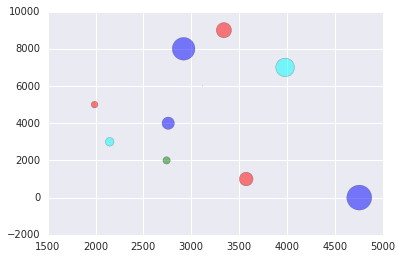

In [72]:
random.seed(10)

N = 50
x = xf
y = yax
colors = ['blue','red','green','cyan']
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [73]:
yf=[0,0,0,0,0,0,0,0,0,0]


for i in test_y:
    if (i== 1):
        yf[0]+=1
    elif(i==2):
        yf[1]+=1
    elif(i==3):
        yf[2]+=1
    elif(i==4):
        yf[3]+=1
    elif(i==5):
        yf[4]+=1
    elif(i==6):
        yf[5]+=1
    elif(i==7):
        yf[6]+=1
    elif(i==8):
        yf[7]+=1
    elif(i==9):
        yf[8]+=1
    elif(i==10):
        yf[9]+=1
        
print(yf)


yaxi=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000]   

[2195, 2181, 2239, 2319, 3156, 2830, 3778, 4482, 3835, 4320]


In [74]:
print(yf)
yf1=[7200,6391,7470,6296,4716,5260,3865,3732,3635,3659]

[2195, 2181, 2239, 2319, 3156, 2830, 3778, 4482, 3835, 4320]


In [75]:
import numpy as np

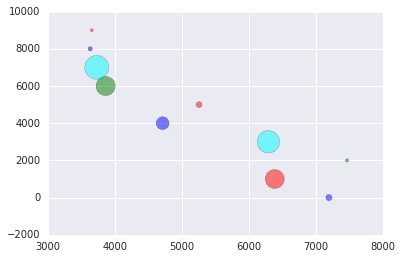

In [76]:

random.seed(10)
N = 50
x = yf1
y = yaxi
colors = ['blue','red','green','cyan']
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

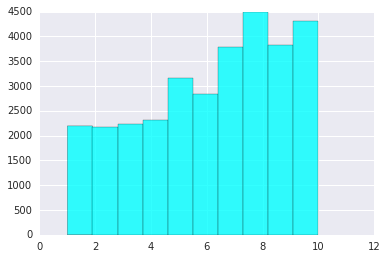

In [77]:
fig = plt.figure()
ay = fig.add_subplot(111)


numBins = 10
ay.hist(test_y,numBins,color='cyan',alpha=0.8)
plt.show()

104448
104448


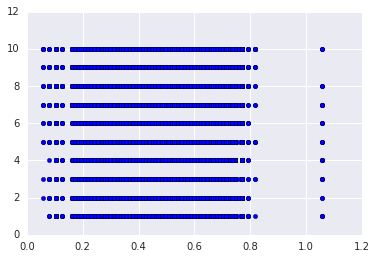

In [78]:
import numpy as np
import matplotlib.pyplot as plt

X=Book[['Age_Stanrd']]
y=Book[['Rating']]

N = 50

colors = np.random.rand(N)
print(X.size)
print(y.size)

plt.scatter(X,y)
plt.show()

In [79]:
prediction = classifier.predict(test_X)
print(prediction)
print(test_y)
print(np.mean(prediction == test_y))
print(classifier.score(test_X, test_y))
print(classifier.score(train_X, train_y))

[ 9  2 10 ...,  1  9  1]
[5 6 1 ..., 9 8 8]
0.114855592788
0.114855592788
0.373640802593


In [80]:
X=Book[['Age_Stanrd','Author_stndr_values','ISBN','UserID']]
y=Book[['Rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.8,
                                                    random_state=123,
                                                    stratify=y)


X_trainsub, X_valid, y_trainsub, y_valid = train_test_split(X_train, y_train,
                                                            test_size=0.8,
                                                            random_state=123,
                                                            stratify=y_train)
X_trainsub=X_trainsub._get_numeric_data()
y_trainsub=y_trainsub._get_numeric_data()
X_valid=X_valid._get_numeric_data()
y_valid=y_valid._get_numeric_data()

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    train_score = knn.fit(X_trainsub, y_trainsub).\
        score(X_trainsub, y_trainsub)
    valid_score = knn.score(X_valid, y_valid)
    print('k: %d, Train/Valid Acc: %.3f/%.3f' %
          (k, train_score, valid_score))



/usr/lib/python3.4/site-packages/ipykernel/__main__.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


k: 1, Train/Valid Acc: 1.000/0.115
k: 2, Train/Valid Acc: 0.562/0.098
k: 3, Train/Valid Acc: 0.441/0.097
k: 4, Train/Valid Acc: 0.399/0.098
k: 5, Train/Valid Acc: 0.373/0.108
k: 6, Train/Valid Acc: 0.348/0.112
k: 7, Train/Valid Acc: 0.333/0.112
k: 8, Train/Valid Acc: 0.313/0.111
k: 9, Train/Valid Acc: 0.296/0.111
k: 10, Train/Valid Acc: 0.288/0.111
k: 11, Train/Valid Acc: 0.278/0.114
k: 12, Train/Valid Acc: 0.278/0.116
k: 13, Train/Valid Acc: 0.269/0.117
k: 14, Train/Valid Acc: 0.257/0.119
k: 15, Train/Valid Acc: 0.253/0.120
k: 16, Train/Valid Acc: 0.252/0.117
k: 17, Train/Valid Acc: 0.244/0.117
k: 18, Train/Valid Acc: 0.244/0.118
k: 19, Train/Valid Acc: 0.238/0.118
k: 20, Train/Valid Acc: 0.237/0.119
k: 21, Train/Valid Acc: 0.239/0.122
k: 22, Train/Valid Acc: 0.234/0.122
k: 23, Train/Valid Acc: 0.232/0.121
k: 24, Train/Valid Acc: 0.230/0.122
k: 25, Train/Valid Acc: 0.229/0.123
k: 26, Train/Valid Acc: 0.226/0.122
k: 27, Train/Valid Acc: 0.224/0.123
k: 28, Train/Valid Acc: 0.223/0.124
k

In [81]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

[   20    22    24 ..., 31278 31287 31291]
[    0     1     2 ..., 31332 31333 31334]
